# NJ Incarcerated Census Exploration with Python

### Step 1: Installing the Neccessary Libraries

In [ ]:
%pip install mysql-connector-python
%pip install matplotlib
%pip install pandas

In [43]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as mp
import csv

### Step 2: Connecting to the SQL Database and Quering the Data
2.1: In this section, I origionally imported the dataset into my own SQL database and queried the data from this notebook. I have kept but commented out the origional code for this process and instead loaded the origional csv file into this folder. This will allow you to easily test the python code yourself without needing to create your own SQL database.

In [56]:
#cnx = mysql.connector.connect(user='root', 
#                                password='******', 
#                                host='127.0.0.1', 
#                                database='database1',)

#cursor = cnx.cursor()

In [57]:
#query  = ("SELECT * FROM database1.nj_ip_census")
#cursor.execute(query)

In [58]:
#response = cursor.fetchall()

In [50]:
response = pd.read_csv('NJDOC_Incarcerated_Persons_Census_20240513.csv')

### Step 3: Importing the Data into the Notebook
3.1: The csv data is fed into a pandas dataframe titled "df1". Column tites were shortened and spaces were replaced with underscores.

In [48]:
df1 = pd.DataFrame(response)
df1.columns = ["ID_Number","Term_at_Admission","Total_Max_Term","Gender","County_of_Admission","Ethnicity","Age"]

print("In total, there were ", df1.shape[0], "Incarcerated persons (IPs) in New Jersey state prisons during 2023.")

df1.head(10)

In total, there were  12004 Incarcerated persons (IPs) in New Jersey state prisons during 2023.


,ID_Number,Term_at_Admission,Total_Max_Term,Gender,County_of_Admission,Ethnicity,Age
0,1,21+ Years,30Y +,M,OTHER,WH,76
1,2,21+ Years,30Y +,M,OTHER,WH,53
2,3,21+ Years,80Y,M,OTHER,WH,80
3,4,21+ Years,48Y,M,OTHER,WH,82
4,5,21+ Years,LIFE WOP_ UNSPECIFIED,M,OTHER,WH,52
5,6,21+ Years,30Y +,M,OTHER,BL,52
6,7,21+ Years,LIFE WOP_ UNSPECIFIED,M,OTHER,WH,52
7,8,21+ Years,33Y,M,ESSEX,BL,58
8,9,21+ Years,30Y +,M,CAMDEN,BL,46
9,10,21+ Years,25Y,M,ATLANTIC,WH,46


### Step 4: Analyze the Age Distribution
4.1: Incarcerated persons were categorized into the histogram below based on their age. The resulting graph demonstrates a right skewed dsitribution in which younger individuals between the ages 30 and 40 are the majority age group in the census. With the 20 to 30 group containing the second highest number of individuals.

Text(0.5, 1.0, 'Age of Incarcerated Persons')

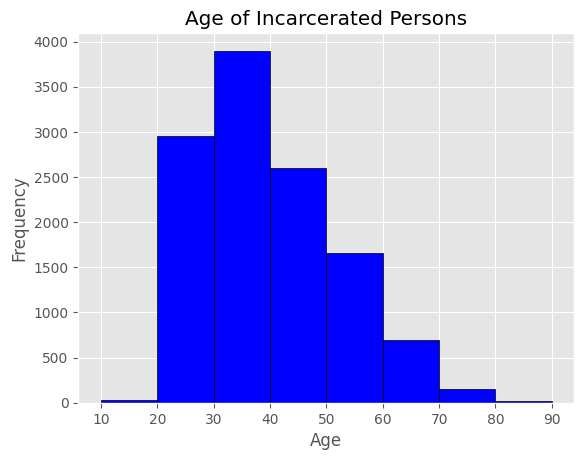

In [5]:
bins = [10,20,30,40,50,60,70,80,90]

mp.style.use('ggplot')
mp.hist(df1["Age"], bins=bins, edgecolor='black', color='blue')

mp.xlabel('Age')
mp.ylabel('Frequency')
mp.title('Age of Incarcerated Persons')

4.2: To further explore the age distribution, the following code uses a custom function to create a new variable named "Elderly_Status". If an individual is aged at or above 65 the attribute "Elderly" is added to their record. A new dataframe was created for this process to avoid makeing unwanted changes to the master data source.

In [26]:
df_age = pd.DataFrame(df1[["ID_Number", "Age"]])

def add_column(row):
    if row["Age"] >= 65: cat = "Elderly"
    else: cat = "Not_Elderly"
    return cat

df_age["Elderly_Status"] = df_age.apply(add_column, axis = 1)

4.3: By calulating the percentage of individuals in both categories, it becomes clear that only 3.5 percent are elderly.

In [30]:
print(sum(df_age['Elderly_Status'] == 'Elderly') / df_age.shape[0] * 100)
print(sum(df_age['Elderly_Status'] == 'Not_Elderly') / df_age.shape[0] * 100)

3.48217260913029
96.51782739086971


4.4: The percentages were fed into a pie chart to visualize the difference between the number of elderly and non-elderly individuals. Percentages, colors, and data labels were made into their own lists and used as the parameters in the "mp.pie" function.

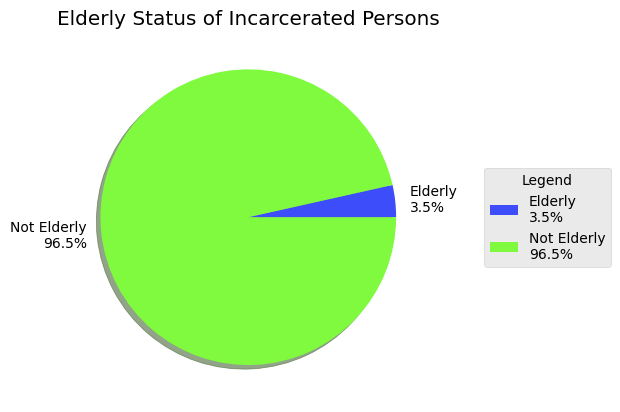

In [24]:

labels = ['Elderly\n3.5%', 'Not Elderly\n96.5%']
colors = ['#3e4dfa', '#7ffa3e']
sizes = [3.5, 96.5]

mp.pie(sizes, labels=labels, colors=colors, shadow=True)

mp.title('Elderly Status of Incarcerated Persons')
mp.legend(title='Legend', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

### Step 5: Explore and Recode Ethnicity Data
5.1: The following bar graph displays the number of individuals within each ethnic group represented in the census. In order to clearly communicate what each abbreviation represents, another custom function was developed to recode the labels to their full titles.  

<Axes: xlabel='Ethnicity', ylabel='Frequency'>

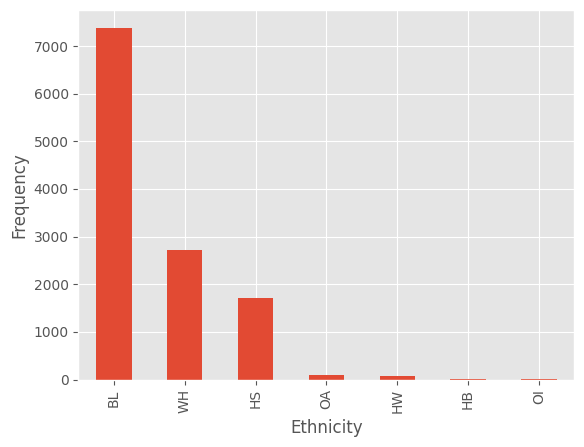

In [32]:
df1["Ethnicity"].value_counts().plot(kind='bar', xlabel='Ethnicity', ylabel='Frequency')

5.2: A new dataframe was created for this process. The output displays the new labels for each ethnic group along with the number of individuals belonging to each of them.

In [77]:
df_eth = pd.DataFrame(df1[["ID_Number", "Ethnicity"]])

def add_column_eth(row):
    if row["Ethnicity"] == 'BL': cat = "Black"
    elif row["Ethnicity"] == 'WH': cat = "White"
    elif row["Ethnicity"] == 'HS': cat = "Hispanic"
    elif row["Ethnicity"] == 'OA': cat = "Asian"
    elif row["Ethnicity"] == 'HW': cat = "Hawaiian/Pacific Islander"
    elif row["Ethnicity"] == 'HB': cat = "Black Hispanic"
    elif row["Ethnicity"] == 'OI': cat = "American Indian"
    return cat

df_eth["Ethnicity"] = df_eth.apply(add_column_eth, axis = 1)
df_eth["Ethnicity"].value_counts()

Black                        7387
White                        2715
Hispanic                     1713
Asian                          98
Hawaiian/Pacific Islander      75
Black Hispanic                 10
American Indian                 6
Name: Ethnicity, dtype: int64

### Step 6: Total Arrests by County
6.1: Another avenue to explore was the number of incarcerated individuals differed depending on their county of admission. A third dataframe was created and used to count the number of entries corresponding to each county.

In [52]:
df_county = pd.DataFrame(df1[["ID_Number", "County_of_Admission", "Term_at_Admission"]])
print(df_county['County_of_Admission'].value_counts())

ESSEX         1821
CAMDEN        1315
PASSAIC        963
UNION          938
MIDDLESEX      884
ATLANTIC       841
HUDSON         780
MERCER         619
MONMOUTH       566
BERGEN         552
BURLINGTON     484
CUMBERLAND     464
OCEAN          407
GLOUCESTER     273
SOMERSET       223
CAPE MAY       217
MORRIS         206
SALEM          126
OTHER           99
SUSSEX          94
WARREN          83
HUNTERDON       49
Name: County_of_Admission, dtype: int64


6.2: One possible avenue is to explore is how prison term at admission differed between each county. To answer this question, the table below was created to crosstab the county of admission variable and term at admission variable. Further below is a table that converts the raw numbers into percentages of the total arrests in that county.

In [53]:
pd.crosstab(df_county["County_of_Admission"], df_county["Term_at_Admission"], margins=True)

Term_at_Admission,1-2 Years,11-14 Years,15-20 Years,21+ Years,3-5 Years,6-10 Years,All
County_of_Admission,,,,,,,
ATLANTIC,63,42,83,195,259,199,841
BERGEN,16,47,50,150,142,147,552
BURLINGTON,27,34,50,107,155,111,484
CAMDEN,106,75,156,291,435,252,1315
CAPE MAY,20,19,21,34,79,44,217
CUMBERLAND,35,13,48,93,170,105,464
ESSEX,156,104,218,534,487,322,1821
GLOUCESTER,27,24,19,47,87,69,273
HUDSON,70,38,105,195,224,148,780


In [54]:
pd.crosstab(df_county["County_of_Admission"], df_county["Term_at_Admission"], normalize='index')

Term_at_Admission,1-2 Years,11-14 Years,15-20 Years,21+ Years,3-5 Years,6-10 Years
County_of_Admission,,,,,,
ATLANTIC,0.074911,0.049941,0.098692,0.231867,0.307967,0.236623
BERGEN,0.028986,0.085145,0.090580,0.271739,0.257246,0.266304
BURLINGTON,0.055785,0.070248,0.103306,0.221074,0.320248,0.229339
CAMDEN,0.080608,0.057034,0.118631,0.221293,0.330798,0.191635
CAPE MAY,0.092166,0.087558,0.096774,0.156682,0.364055,0.202765
CUMBERLAND,0.075431,0.028017,0.103448,0.200431,0.366379,0.226293
ESSEX,0.085667,0.057111,0.119714,0.293245,0.267435,0.176826
GLOUCESTER,0.098901,0.087912,0.069597,0.172161,0.318681,0.252747
HUDSON,0.089744,0.048718,0.134615,0.250000,0.287179,0.189744


In [ ]:
#cnx.close()
#cursor.close()